# Installation

In [ ]:
# 1) Install ultralytics if needed (comment out if already installed)
# %pip install ultralytics
# %pip install pandas
# %pip install tabulate   # optional, if you want tabulate

In [2]:
# Update the settings to point to the datasets and runs directories
from ultralytics import settings
from ct_detector import DATASETS_DIR, ROOT_DIR
import os

settings.update({'datasets_dir': DATASETS_DIR, 'runs_dir': os.path.join(ROOT_DIR, 'runs')})

# Evaluate single model

In [3]:
# 1) evaluate a single model
import pandas as pd
from tabulate import tabulate
from ct_detector.model import evaluate_model
from ct_detector.model import MODELS, DATASETS

# 2) (Optional) If you have a GPU and want to specify it, set device='0' or 'cpu'
model_path = MODELS['eie_t_1_yolov8m']  # or your custom model: 'path/to/best.pt'
data_path  = DATASETS.get("1", None)  # or your dataset .yaml or folder of images
device = '' # '' or 'cpu for CPU, '0' for GPU 0, '1' for GPU 1, etc.

# 4) Run evaluation
results = evaluate_model(
    model_path=model_path,
    data_path=data_path,
    conf=0.25,
    iou=0.45,
    device=device,
    imgsz=640,
    save_json=False,
    project='runs/model_evaluation',
    name='demo_evaluate',
    verbose=True # True to print results, False to suppress
)
# 5) (Optional) If you want detailed outputs, you can look at results.keys():
print("\nAll results keys:", dir(results))

Ultralytics 8.3.101  Python-3.11.3 torch-2.6.0+cpu CPU (Intel Core(TM) i7-4790K 4.00GHz)
Model summary (fused): 92 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning D:\Dílna\Kutění\Junek\ct_detector\assets\datasets\1\val\labels.cache... 20 images, 1 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]


KeyboardInterrupt: 

<class 'ultralytics.utils.metrics.ConfusionMatrix'>


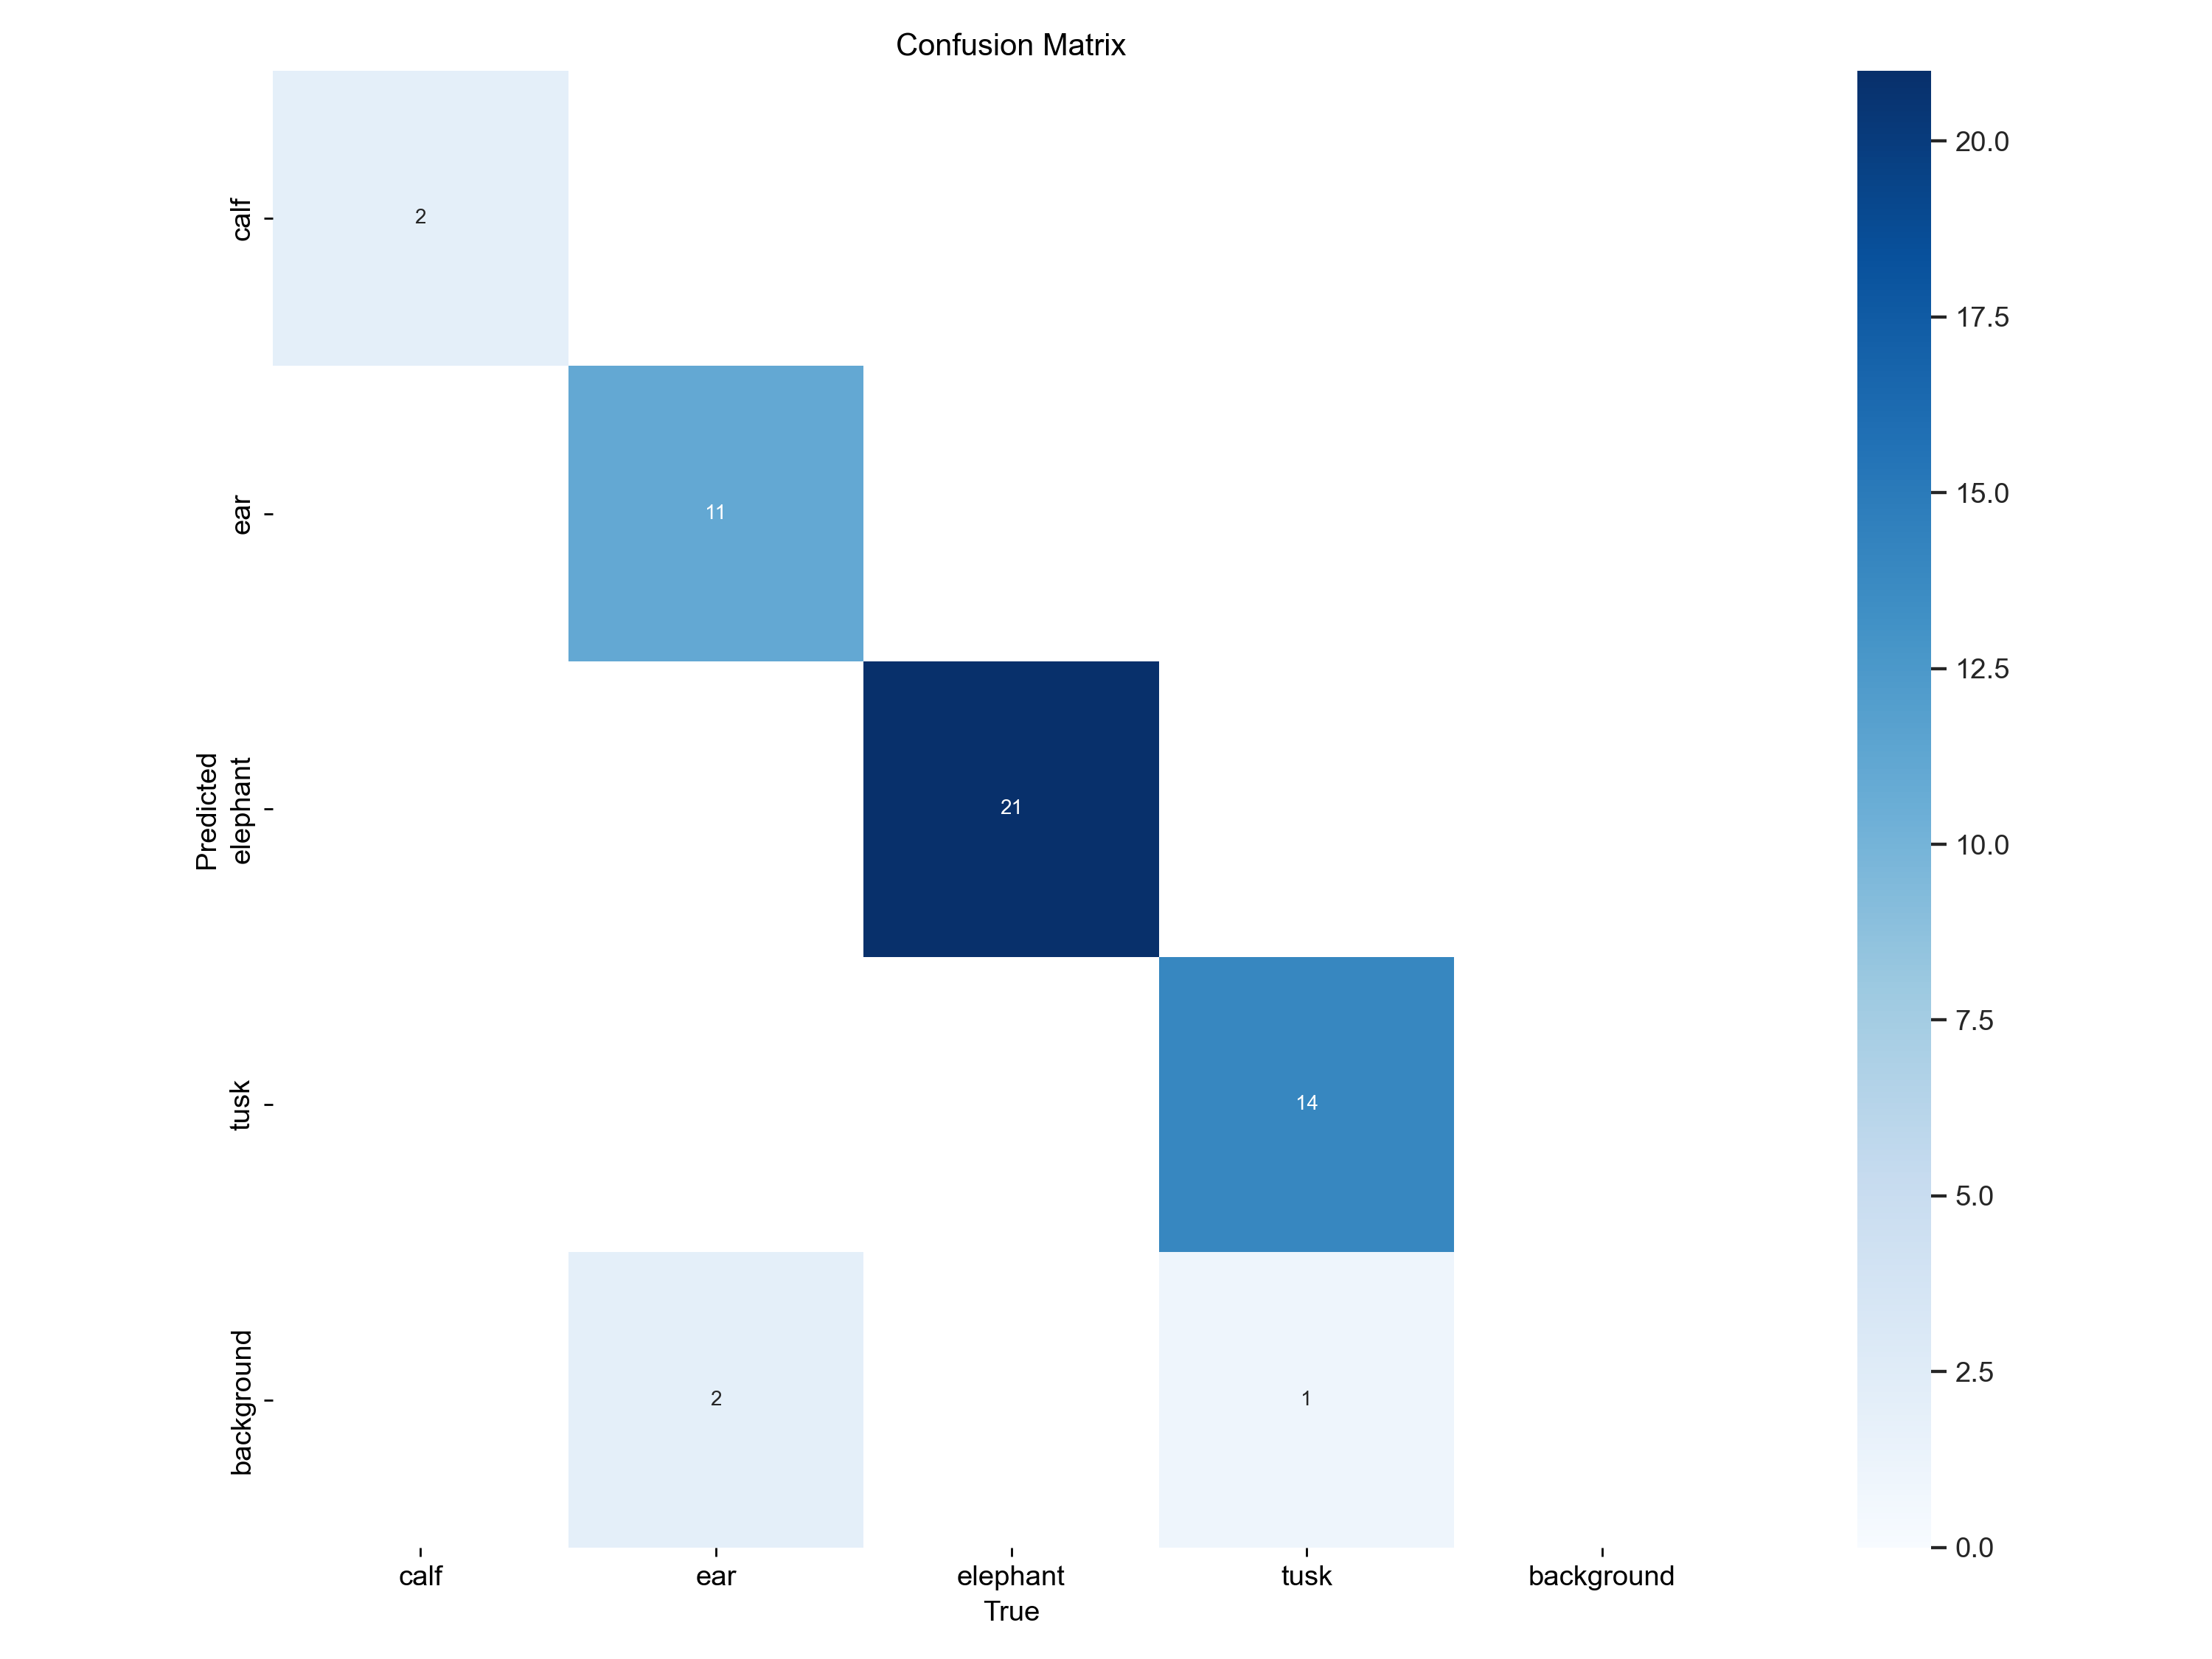

In [54]:
# 6) (Optional) If you want to display confusion matrix you can do this:
from ct_detector.display import display_confusion_matrix
from functools import partial

callback = partial(display_confusion_matrix, width=640, height=640)
results.confusion_matrix.plot(normalize=False, names=tuple(c for c in results.names.values()), on_plot=callback)

# Evaluate multiple models

In [3]:
# 2) compare models
from ct_detector.model import compare_models
from ct_detector.model import MODELS, DATASETS

# Print all available models
print("Available models:")
for model_name, model_path in MODELS.items():
    print(f"{model_name}: {model_path}")

# Print all available datasets
print("\nAvailable datasets:")
for dataset_name, dataset_path in DATASETS.items():
    print(f"{dataset_name}: {dataset_path}")

# Create a list of model paths to compare from the MODELS dictionary that automatically gets all available models
model_list = [path for path in MODELS.values() if path.endswith('.pt')]
#model_list = [MODELS['eie_t_1_yolov8m']]  # Add more models as needed

# Alternatively, you can specify specific models like this:
# model_list = [MODELS['yolov8n.pt'], MODELS['yolov8s.pt']]  # Add more models as needed

# Get the default dataset path from the DATASETS dictionary which is a dictionary of available datasets
data_path = DATASETS.get("1", None)  # Or 'path/to/yourData.yaml'

results = compare_models(
    model_paths=model_list,
    data_path=data_path,
    conf=0.25,
    iou=0.45,
    device='',   # GPU if available, else '' or 'cpu'
    imgsz=640,
    project='runs/model_comparison',
    name='demo_compare',
    verbose=False
)

# results is a dictionary of results for each model where keys are model names and values are the results
print("\n--- Retrieved Evaluation Results For: ---")
for key in results.keys():
    print(f"\n--- {key} ---")

Available models:
eie_t_1_yolo11l: D:\Dílna\Kutění\Junek\ct_detector\assets\models\eie_t_1_yolo11l.pt
eie_t_1_yolo11m: D:\Dílna\Kutění\Junek\ct_detector\assets\models\eie_t_1_yolo11m.pt
eie_t_1_yolo12m: D:\Dílna\Kutění\Junek\ct_detector\assets\models\eie_t_1_yolo12m.pt
eie_t_1_yolov8m: D:\Dílna\Kutění\Junek\ct_detector\assets\models\eie_t_1_yolov8m.pt
eie_t_1_yolov8_world2: D:\Dílna\Kutění\Junek\ct_detector\assets\models\eie_t_1_yolov8_world2.pt
eie_t_1_yolov9e: D:\Dílna\Kutění\Junek\ct_detector\assets\models\eie_t_1_yolov9e.pt
eie_t_1_yolov9m: D:\Dílna\Kutění\Junek\ct_detector\assets\models\eie_t_1_yolov9m.pt

Available datasets:
1: D:\Dílna\Kutění\Junek\ct_detector\assets\datasets\1\1.yaml
Ultralytics 8.3.101  Python-3.11.3 torch-2.6.0+cpu CPU (Intel Core(TM) i7-4790K 4.00GHz)
YOLO11l summary (fused): 190 layers, 25,282,396 parameters, 0 gradients, 86.6 GFLOPs


val: Scanning D:\Dílna\Kutění\Junek\ct_detector\assets\datasets\1\val\labels.cache... 20 images, 1 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.37s/it]


                   all         20         51      0.998      0.939      0.967      0.834
Speed: 7.4ms preprocess, 700.4ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs\model_comparison\demo_compare_04
Ultralytics 8.3.101  Python-3.11.3 torch-2.6.0+cpu CPU (Intel Core(TM) i7-4790K 4.00GHz)
YOLO11m summary (fused): 125 layers, 20,033,116 parameters, 0 gradients, 67.7 GFLOPs


val: Scanning D:\Dílna\Kutění\Junek\ct_detector\assets\datasets\1\val\labels.cache... 20 images, 1 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.83s/it]


                   all         20         51      0.944      0.981      0.986      0.802
Speed: 6.9ms preprocess, 549.8ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs\model_comparison\demo_compare_12
Ultralytics 8.3.101  Python-3.11.3 torch-2.6.0+cpu CPU (Intel Core(TM) i7-4790K 4.00GHz)
YOLOv12m summary (fused): 169 layers, 20,107,996 parameters, 0 gradients, 67.1 GFLOPs


val: Scanning D:\Dílna\Kutění\Junek\ct_detector\assets\datasets\1\val\labels.cache... 20 images, 1 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.13s/it]


                   all         20         51      0.989      0.933      0.973       0.81
Speed: 3.0ms preprocess, 698.6ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\model_comparison\demo_compare_22
Ultralytics 8.3.101  Python-3.11.3 torch-2.6.0+cpu CPU (Intel Core(TM) i7-4790K 4.00GHz)
Model summary (fused): 92 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning D:\Dílna\Kutění\Junek\ct_detector\assets\datasets\1\val\labels.cache... 20 images, 1 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.28s/it]


                   all         20         51          1      0.945       0.97      0.853
Speed: 2.0ms preprocess, 516.3ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\model_comparison\demo_compare_32
Ultralytics 8.3.101  Python-3.11.3 torch-2.6.0+cpu CPU (Intel Core(TM) i7-4790K 4.00GHz)
YOLOv8m-worldv2 summary (fused): 107 layers, 28,358,830 parameters, 0 gradients, 86.3 GFLOPs


val: Scanning D:\Dílna\Kutění\Junek\ct_detector\assets\datasets\1\val\labels.cache... 20 images, 1 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.66s/it]


                   all         20         51      0.934      0.887      0.959      0.789
Speed: 1.9ms preprocess, 551.4ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs\model_comparison\demo_compare_42
Ultralytics 8.3.101  Python-3.11.3 torch-2.6.0+cpu CPU (Intel Core(TM) i7-4790K 4.00GHz)
YOLOv9e summary (fused): 279 layers, 57,379,484 parameters, 0 gradients, 189.1 GFLOPs


val: Scanning D:\Dílna\Kutění\Junek\ct_detector\assets\datasets\1\val\labels.cache... 20 images, 1 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]Exception ignored in sys.unraisablehook: <built-in function unraisablehook>
Traceback (most recent call last):
KeyboardInterrupt

KeyboardInterrupt

